# Machine Learning for Ridership Prediction
### Using ARIMA Model to predict the amount of ridership for any particular bus route or a train station


In [1]:
# Imports
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
from loss import ape

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def parser(x):
    return datetime.strptime(x, '%m/%d/%Y')

## Bus route ridership prediction

In [4]:
# Importing dataset
folder_location = 'data'
file_name = 'CTA_-_Ridership_-_Bus_Routes_-_Monthly_Day-Type_Averages___Totals.csv'
bus = pd.read_csv(open(folder_location + '\\' + file_name), parse_dates=['Month_Beginning'], date_parser=parser)

**Bus Dataset**

In [5]:
bus

,route,routename,Month_Beginning,Avg_Weekday_Rides,Avg_Saturday_Rides,Avg_Sunday-Holiday_Rides,MonthTotal
0,1,Indiana/Hyde Park,2001-01-01,6982.6,0.0,0.0,153617
1,2,Hyde Park Express,2001-01-01,1000.0,0.0,0.0,22001
2,3,King Drive,2001-01-01,21406.5,13210.7,8725.3,567413
3,4,Cottage Grove,2001-01-01,22432.2,17994.0,10662.2,618796
4,6,Jackson Park Express,2001-01-01,18443.0,13088.2,7165.6,493926
...,...,...,...,...,...,...,...
31435,172,U. of Chicago/Kenwood,2019-12-01,1435.9,396.8,281.8,33432
31436,192,U. of Chicago Hospitals Express,2019-12-01,606.3,0.0,0.0,12732
31437,201,Central/Ridge,2019-12-01,1902.8,936.4,0.0,43705
31438,206,Evanston Circulator,2019-12-01,507.5,0.0,0.0,10657


### We clean the dataset and extract only the important features for our time series analysis

In [17]:
len(list(set(bus.routename)))

189

In [6]:
df = bus.loc[bus['route'] == '8']
df

,route,routename,Month_Beginning,Avg_Weekday_Rides,Avg_Saturday_Rides,Avg_Sunday-Holiday_Rides,MonthTotal
6,8,Halsted,2001-01-01,19582.2,12420.0,8280.8,521892
136,8,Halsted,2001-02-01,20741.7,12528.9,9279.6,502067
267,8,Halsted,2001-03-01,20442.8,13256.7,9257.3,553054
399,8,Halsted,2001-04-01,19911.5,13060.0,9281.7,516791
532,8,Halsted,2001-05-01,20071.9,12958.0,9308.0,539954
...,...,...,...,...,...,...,...
30813,8,Halsted,2019-08-01,18944.0,11363.3,8377.9,507096
30941,8,Halsted,2019-09-01,23848.6,12569.7,8983.5,581152
31069,8,Halsted,2019-10-01,23339.5,12329.4,8873.8,621620
31195,8,Halsted,2019-11-01,22604.8,12162.5,8348.4,554652


In [7]:
df = df.loc[:, ['Month_Beginning', 'MonthTotal']]
df.set_index('Month_Beginning', inplace=True)
df

,MonthTotal
Month_Beginning,
2001-01-01,521892
2001-02-01,502067
2001-03-01,553054
2001-04-01,516791
2001-05-01,539954
...,...
2019-08-01,507096
2019-09-01,581152
2019-10-01,621620


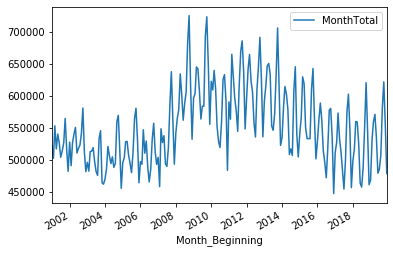

In [8]:
df.iloc[:].plot()
pyplot.show()

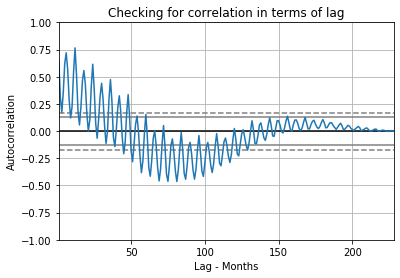

In [9]:
autocorrelation_plot(df)
pyplot.title('Checking for correlation in terms of lag')
pyplot.xlabel('Lag - Months')
pyplot.show()

As observed, the recent data highly corelates with the past 6-12 months. Using this information, we set a lag of 5 to begin, and optimize from there.

### Fitting the training data to ARIMA and optimizing the hyperparameters

                             ARIMA Model Results                              
Dep. Variable:           D.MonthTotal   No. Observations:                  227
Model:                 ARIMA(8, 1, 0)   Log Likelihood               -2683.923
Method:                       css-mle   S.D. of innovations          32780.130
Date:                Mon, 27 Apr 2020   AIC                           5387.847
Time:                        13:34:24   BIC                           5422.096
Sample:                             1   HQIC                          5401.667
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 83.4525    724.265      0.115      0.908   -1336.081    1502.986
ar.L1.D.MonthTotal    -0.5895      0.065     -9.131      0.000      -0.716      -0.463
ar.L2.D.MonthTotal  

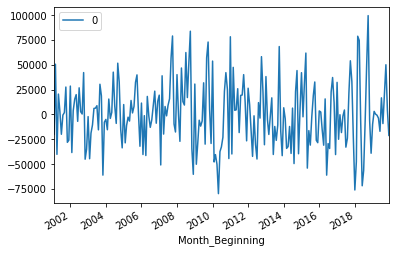

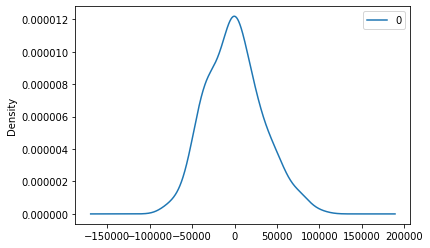

                  0
count    227.000000
mean     -39.641983
std    33030.855543
min   -79843.704278
25%   -25546.443436
50%    -1304.214416
75%    19693.739173
max    99464.715953


In [10]:
# fit model
model = ARIMA(df, order=(8,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

We can notice the gausian bias that exists in the data. We can use this information to optimize our hyperparameters further to achieve a much prediction.

## Rolling Predictions
### We use the information gained from the above experiment to train and test the model. We start by training the model on the data of 2001 to 2018. Using this trained model, we predict the average ridership for the month of January, 2019. We then add this predicted value to the data and re-train the model, to predict the value for the month of February, and so on till the month of December.

In [11]:
# Rolling Predictions
X = df.values
size = len(X) - 12 # 1 year
train, test = X[0:size], X[size:len(X)]
test = [x[0] for x in test]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(8,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat[0])
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = ape(test, predictions)
print('Test Absolute Percentage Error: ' + str(round(error, 5)))

predicted=479867.777555, expected=467743.000000
predicted=527759.762329, expected=531481.000000
predicted=557420.129610, expected=558744.000000
predicted=570731.023749, expected=570932.000000
predicted=538712.445641, expected=535001.000000
predicted=496342.324956, expected=478794.000000
predicted=468478.411327, expected=484726.000000
predicted=516488.035358, expected=507096.000000
predicted=560100.857549, expected=581152.000000
predicted=570557.454090, expected=621620.000000
predicted=550702.931338, expected=554652.000000
predicted=499999.997855, expected=478084.000000
Test Absolute Percentage Error: 0.02522


**We are able to acheive an accuracy of ~ 97.5%**

In [18]:
# Checking change
avg_pred = sum(predictions) / len(predictions)
print('Average Pred: ' + str(avg_pred))
avg_history = sum(history) / len(history)
print('Average History: ' + str(avg_history[0]))
percent_change = avg_pred / avg_history
print('% change: ' + str(percent_change[0]))
if(percent_change <= 0.98): 
    if(percent_change >= 0.95):
        print('Slight Decrease')
    else:
        print('Heavy Decrease')
elif(percent_change >= 1.02):
    if(percent_change <= 1.05):
        print('Slight Increase')
    else:
        print('Heavy Increase')
else:
    print('No significant change')

Average Pred: 528096.7626130572
Average History: 551139.1842105263
% change: 0.9581912840574455
Slight Decrease


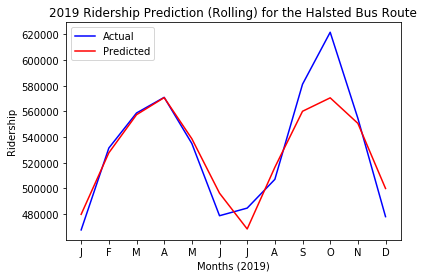

In [13]:
# plot
pyplot.title('2019 Ridership Prediction (Rolling) for the Halsted Bus Route')
pyplot.plot(test, color='blue', label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend(loc="upper left")
pyplot.xticks(np.arange(12), ('J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'))
pyplot.xlabel('Months (2019)')
pyplot.ylabel('Ridership')
pyplot.show()

**It should be noted that, as we continue to predict values for much further in the future, the predictions become less accurate. Obviously, it is easier to predict the average ridership for the upcoming month, compared to 6 months from now. Regardless, the model performs quite well.**

## Train Station ridership prediction

In [19]:
# Importing dataset
folder_location = 'data'
file_name = 'CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals.csv'
trains = pd.read_csv(open(folder_location + '\\' + file_name), parse_dates=['month_beginning'], date_parser=parser)

**Train Dataset**

In [20]:
trains

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189
...,...,...,...,...,...,...,...
32468,40850,Library,2019-12-01,2894.6,1253.5,792.7,70556
32469,40680,Adams/Wabash,2019-12-01,5498.6,2258.8,1460.5,133268
32470,41700,Washington/Wabash,2019-12-01,9848.1,5374.5,3535.5,249522
32471,40260,State/Lake,2019-12-01,10751.6,5683.5,3810.5,271380


In [21]:
np.array(sorted(trains.stationame.unique().tolist()))

array(['18th', '35-Bronzeville-IIT', '35th/Archer', '43rd',
       '47th-Dan Ryan', '47th-South Elevated', '51st', '54th/Cermak',
       '63rd-Dan Ryan', '69th', '79th', '87th', '95th/Dan Ryan',
       'Adams/Wabash', 'Addison-Brown', 'Addison-North Main',
       "Addison-O'Hare", 'Argyle', 'Armitage', 'Ashland-Lake',
       'Ashland-Orange', 'Ashland/63rd', 'Austin-Forest Park',
       'Austin-Lake', 'Belmont-North Main', "Belmont-O'Hare", 'Berwyn',
       'Bryn Mawr', 'California-Cermak', 'California-Lake',
       'California/Milwaukee', 'Central Park', 'Central-Evanston',
       'Central-Lake', 'Cermak-Chinatown', 'Cermak-McCormick Place',
       'Chicago/Franklin', 'Chicago/Milwaukee', 'Chicago/State',
       'Cicero-Cermak', 'Cicero-Forest Park', 'Cicero-Lake',
       'Clark/Division', 'Clark/Lake', 'Clinton-Forest Park',
       'Clinton-Lake', 'Conservatory', 'Cumberland', 'Damen-Brown',
       'Damen-Cermak', 'Damen/Milwaukee', 'Davis', 'Dempster',
       'Dempster-Skokie', 'Div

### We clean the dataset and extract only the important features for our time series analysis

In [32]:
len(list(set(trains.station_id)))

147

In [23]:
df = trains.loc[trains['stationame'] == 'Jefferson Park']
df

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
47,41280,Jefferson Park,2001-01-01,6619.0,2717.5,1754.0,165259
189,41280,Jefferson Park,2001-02-01,6661.4,2645.8,1872.0,151298
330,41280,Jefferson Park,2001-03-01,6709.9,2904.6,1933.8,169875
471,41280,Jefferson Park,2001-04-01,6595.1,2862.0,2043.4,160163
613,41280,Jefferson Park,2001-05-01,6824.5,3020.5,2103.8,172739
...,...,...,...,...,...,...,...
31805,41280,Jefferson Park,2019-08-01,6410.1,2786.8,1598.3,161350
31948,41280,Jefferson Park,2019-09-01,6856.5,3340.8,2734.8,166902
32091,41280,Jefferson Park,2019-10-01,6681.5,3285.5,2683.3,177549
32234,41280,Jefferson Park,2019-11-01,6375.3,3181.2,2519.6,156009


In [24]:
df = df.loc[:, ['month_beginning', 'monthtotal']]
df.set_index('month_beginning', inplace=True)
df

,monthtotal
month_beginning,
2001-01-01,165259
2001-02-01,151298
2001-03-01,169875
2001-04-01,160163
2001-05-01,172739
...,...
2019-08-01,161350
2019-09-01,166902
2019-10-01,177549


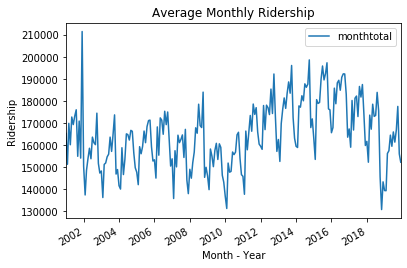

In [25]:
df.iloc[:].plot()
pyplot.title('Average Monthly Ridership')
pyplot.xlabel('Month - Year')
pyplot.ylabel('Ridership')
pyplot.show()

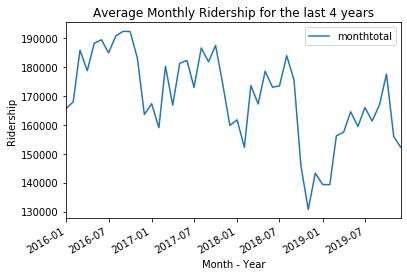

In [26]:
df.iloc[-48:].plot()
pyplot.title('Average Monthly Ridership for the last 4 years')
pyplot.xlabel('Month - Year')
pyplot.ylabel('Ridership')
pyplot.show()

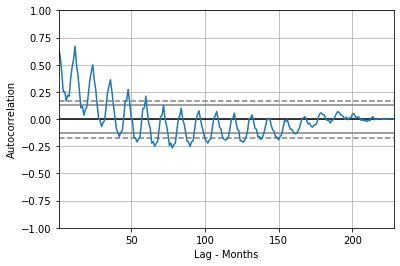

In [27]:
autocorrelation_plot(df)
pyplot.xlabel('Lag - Months')
pyplot.show()

As observed, the recent data highly corelates with the past 6-12 months. Using this information, we set a lag of 5 to begin, and optimize from there.

### Fitting the training data to ARIMA and optimizing the hyperparameters

                             ARIMA Model Results                              
Dep. Variable:           D.monthtotal   No. Observations:                  227
Model:                 ARIMA(8, 1, 1)   Log Likelihood               -2398.796
Method:                       css-mle   S.D. of innovations           9338.409
Date:                Mon, 27 Apr 2020   AIC                           4819.592
Time:                        13:48:22   BIC                           4857.266
Sample:                             1   HQIC                          4834.794
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -32.9541    117.469     -0.281      0.779    -263.189     197.281
ar.L1.D.monthtotal    -0.0224      0.082     -0.275      0.784      -0.182       0.137
ar.L2.D.monthtotal  

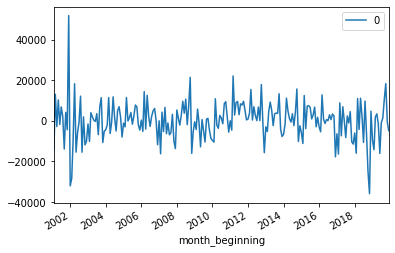

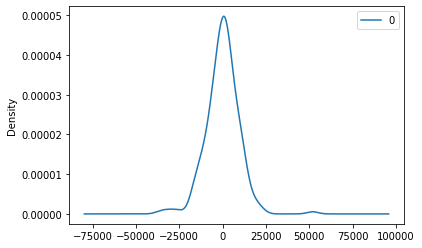

                  0
count    227.000000
mean      22.652457
std     9420.055162
min   -35862.249721
25%    -5058.845616
50%      390.677130
75%     4936.772786
max    51880.141616


In [28]:
# fit model
model = ARIMA(df, order=(8,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

We can notice the gausian bias that exists in the data. We can use this information to optimize our hyperparameters further to achieve a much prediction.

## Rolling Predictions
### We use the information gained from the above experiment to train and test the model. We start by training the model on the data of 2001 to 2018. Using this trained model, we predict the average ridership for the month of January, 2019. We then add this predicted value to the data and re-train the model, to predict the value for the month of February, and so on till the month of December.

In [29]:
# Rolling Predictions
X = df.values
size = len(X) - 12 # 1 year
train, test = X[0:size], X[size:len(X)]
test = [x[0] for x in test]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(8,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat[0])
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = ape(test, predictions)
print('Test Absolute Percentage Error: ' + str(round(error, 5)))

predicted=150356.541776, expected=139394.000000
predicted=154942.981814, expected=139322.000000
predicted=154217.872973, expected=156216.000000
predicted=153945.248059, expected=157455.000000
predicted=167344.250918, expected=164524.000000
predicted=176626.285815, expected=159458.000000
predicted=166415.508536, expected=165973.000000
predicted=159209.684470, expected=161350.000000
predicted=155580.665957, expected=166902.000000
predicted=158669.890033, expected=177549.000000
predicted=156564.431427, expected=156009.000000
predicted=157299.021975, expected=152250.000000
Test Absolute Percentage Error: 0.04812


**We are able to acheive an accuracy of ~ 95.2%**

In [30]:
# Checking change
avg_pred = sum(predictions) / len(predictions)
print('Average Pred: ' + str(avg_pred))
avg_history = sum(history) / len(history)
print('Average History: ' + str(avg_history))
percent_change = avg_pred / avg_history
print('% change: ' + str(percent_change))
if(percent_change <= 0.98): 
    if(percent_change >= 0.95):
        print('Slight Decrease')
    else:
        print('Heavy Decrease')
elif(percent_change >= 1.02):
    if(percent_change <= 1.05):
        print('Slight Increase')
    else:
        print('Heavy Increase')
else:
    print('No significant change')

Average Pred: 159264.36531293744
Average History: [164565.80263158]
% change: [0.9677853]
Slight Decrease


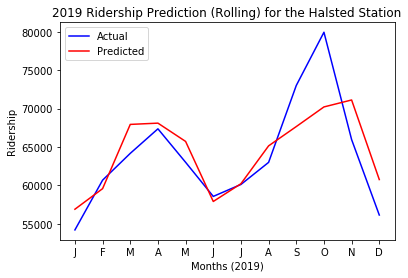

In [50]:
# plot
pyplot.title('2019 Ridership Prediction (Rolling) for the Halsted Station')
pyplot.plot(test, color='blue', label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend(loc="upper left")
pyplot.xticks(np.arange(12), ('J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'))
pyplot.xlabel('Months (2019)')
pyplot.ylabel('Ridership')
pyplot.show()

**It should be noted that, as we continue to predict values for much further in the future, the predictions become less accurate. Obviously, it is easier to predict the average ridership for the upcoming month, compared to 6 months from now. Regardless, the model performs quite well.**